
📈 XGBoost with Scaling Model Evaluation:
MAE: 1.6659
RMSE: 9.1402
R² Score: 0.0206

📈 Baseline Model Evaluation:
MAE: 1.5219
RMSE: 9.2540
R² Score: -0.0040


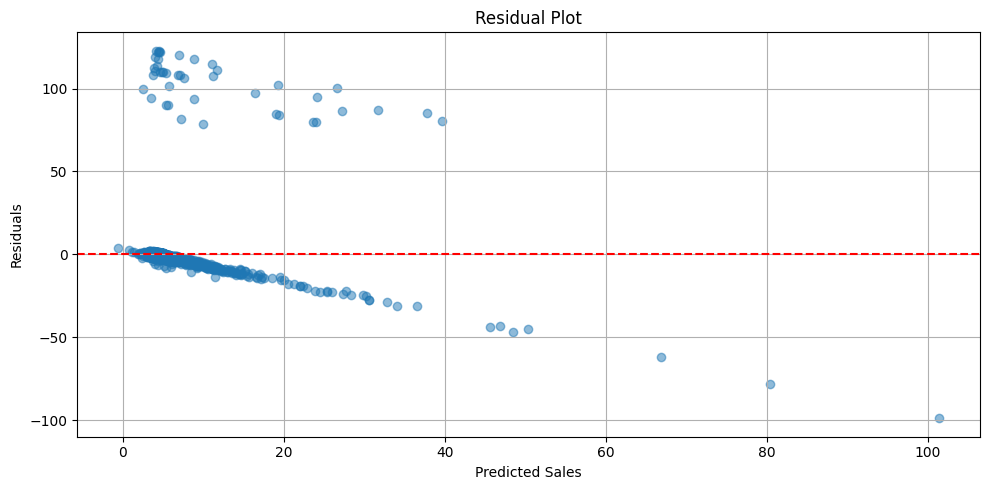

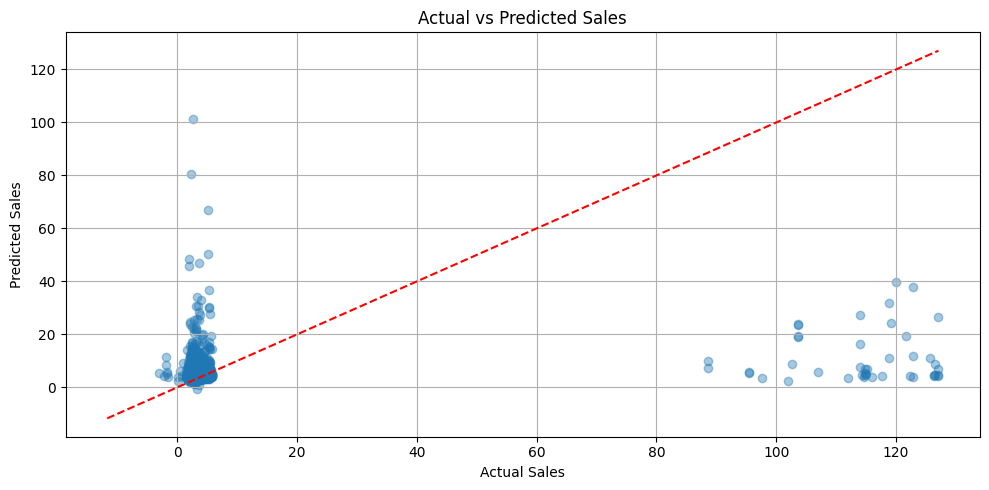

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")


df = pd.read_excel("C:/Users/rid/OneDrive/Desktop/Case Study 3  Sales Prediction.xlsx")
df.columns = df.columns.str.strip()


df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Sales Amount'] = pd.to_numeric(df['Sales Amount'], errors='coerce')
df['Sales Amount'].fillna(method='ffill', inplace=True)
df.drop(columns=['Region'], inplace=True)


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)
df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)
df.drop(columns=['Date'], inplace=True)


df['Country_Segment'] = df['Country'] + '_' + df['Segment']
df = pd.get_dummies(df, drop_first=True)


X = df.drop(columns=['Sales Amount'])
y = df['Sales Amount']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(
        n_estimators=700,
        learning_rate=0.01,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)


def evaluate(y_true, y_pred, label=""):
    print(f"\n📈 {label}Model Evaluation:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

evaluate(y_test, y_pred, label="XGBoost with Scaling ")


y_baseline = [y_train.median()] * len(y_test)
evaluate(y_test, y_baseline, label="Baseline ")


residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()
